In [3]:
import numpy as np
import pandas as pd

In [5]:
station_0_data = pd.read_csv("Data_csv/Station_00.csv")

In [12]:
station_0_data.head()

,Year,Month,Day,T obs,T mod,P obs,P mod,H obs,H mod,W obs,W mod,SW obs,SW mod
0,2001,1,1,NaN,0.97,NaN,0.00,NaN,32.22,4.95,2.67,NaN,77.18
1,2001,1,2,NaN,4.20,NaN,0.41,NaN,79.75,3.01,2.41,NaN,69.72
2,2001,1,3,NaN,1.47,NaN,2.39,NaN,83.82,3.15,3.00,NaN,55.23
3,2001,1,4,NaN,3.07,NaN,4.32,NaN,67.58,5.13,3.73,NaN,73.89
4,2001,1,5,NaN,4.65,NaN,0.74,NaN,59.15,6.84,5.14,NaN,74.07


In [7]:
station_0_data.describe()

,Year,Month,Day,T obs,T mod,P obs,P mod,H obs,H mod,W obs,W mod,SW obs,SW mod
count,3287.000000,3287.000000,3287.000000,1331.000000,3287.00000,0.0,3287.000000,1331.000000,3287.000000,3024.000000,3287.000000,0.0,3287.000000
mean,2005.000608,6.523274,15.728628,4.417385,6.92286,NaN,5.521625,76.649391,76.079805,3.579911,2.461965,NaN,172.233480
std,2.582185,3.449133,8.801004,7.687822,8.03516,NaN,9.039069,20.781325,15.007558,1.844212,1.034364,NaN,97.075792
min,2001.000000,1.000000,1.000000,-15.530000,-19.02000,NaN,0.000000,8.400000,22.480000,0.000000,0.370000,NaN,6.850000
25%,2003.000000,4.000000,8.000000,-1.090000,1.10500,NaN,0.000000,62.415000,66.305000,2.380000,1.730000,NaN,83.680000
50%,2005.000000,7.000000,16.000000,4.320000,7.67000,NaN,1.550000,82.950000,78.420000,3.285000,2.210000,NaN,157.220000
75%,2007.000000,10.000000,23.000000,10.055000,13.26500,NaN,7.675000,94.310000,88.330000,4.460000,2.970000,NaN,253.700000
max,2009.000000,12.000000,31.000000,22.640000,25.71000,NaN,106.350000,100.000000,100.000000,12.720000,7.800000,NaN,383.520000


In [9]:
station_0_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    3287 non-null   int64  
 1   Month   3287 non-null   int64  
 2   Day     3287 non-null   int64  
 3   T obs   1331 non-null   float64
 4   T mod   3287 non-null   float64
 5   P obs   0 non-null      float64
 6   P mod   3287 non-null   float64
 7   H obs   1331 non-null   float64
 8   H mod   3287 non-null   float64
 9   W obs   3024 non-null   float64
 10  W mod   3287 non-null   float64
 11  SW obs  0 non-null      float64
 12  SW mod  3287 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 334.0 KB


# Data visualization

In [14]:
import datetime

In [69]:
station_0_data_augmented["full_date"].min()

Timestamp('2001-01-01 00:00:00')

In [28]:
station_0_data_augmented = station_0_data[::]
station_0_data_augmented["full_date"] = pd.to_datetime(station_0_data_augmented[["Year","Month","Day"]])

C:\Users\HP Z\AppData\Local\Temp\ipykernel_25796\3505783915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_0_data_augmented["full_date"] = pd.to_datetime(station_0_data_augmented[["Year","Month","Day"]])


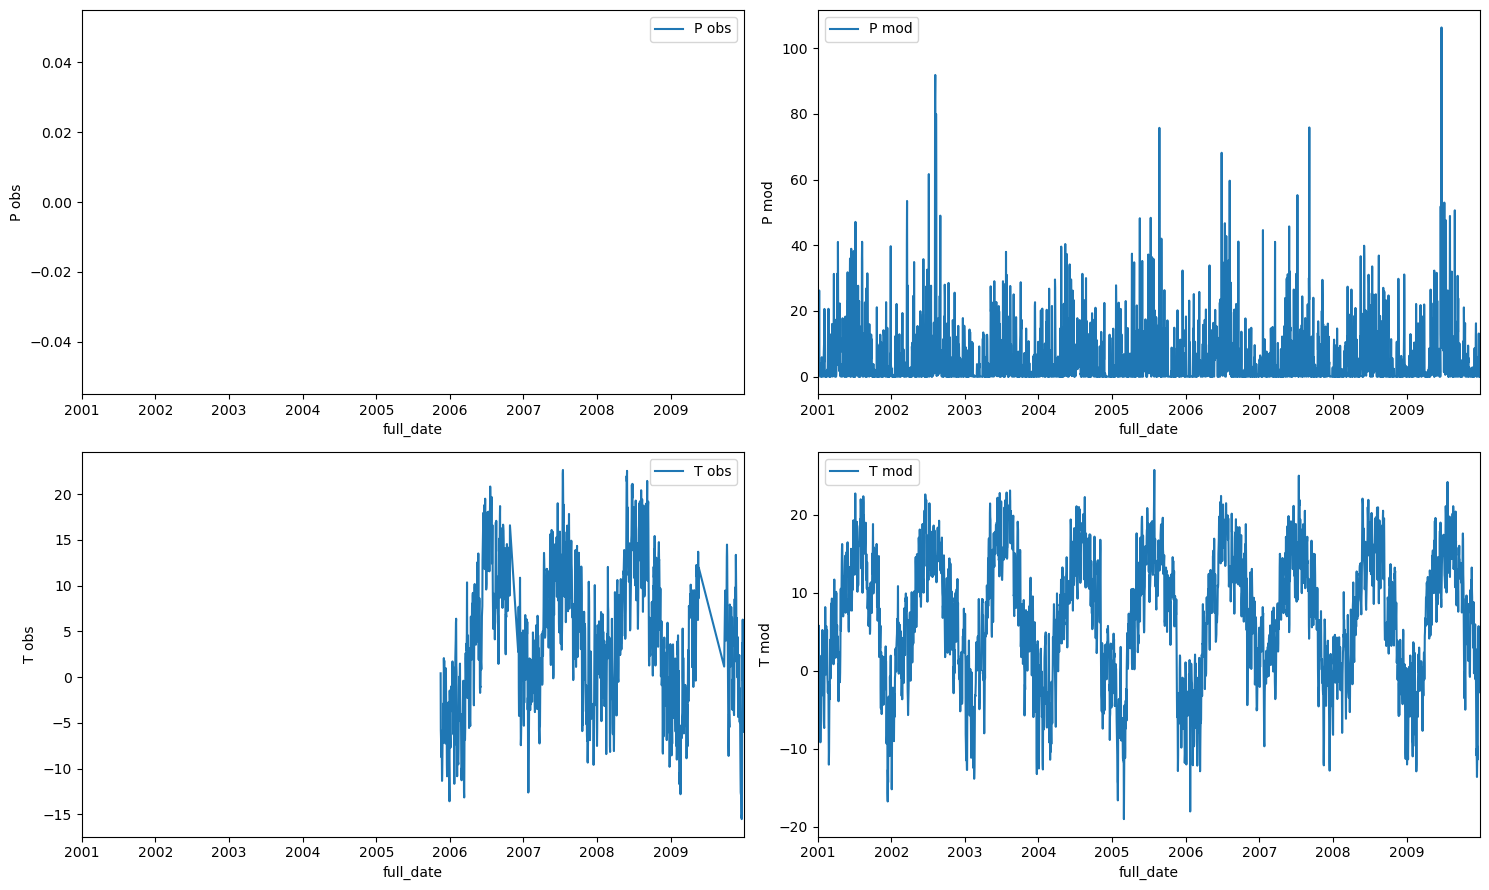

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
targets = ["P","T"]
obs_targets = [t + " obs" for t in targets]
mod_targets = [t +  " mod" for t in targets]

plt.figure(figsize=(15,9))
for idx in range(len(targets)):
    ax = plt.subplot(len(targets), 2, idx*2 + 1)
    sns.lineplot(x=station_0_data_augmented["full_date"], 
             y=station_0_data_augmented[obs_targets[idx]],ax = ax,label=f"{obs_targets[idx]}")
    plt.xlim(station_0_data_augmented["full_date"].min(),station_0_data_augmented["full_date"].max())
    ax = plt.subplot(len(targets), 2, idx*2 + 2)
    sns.lineplot(x=station_0_data_augmented["full_date"], 
             y=station_0_data_augmented[mod_targets[idx]],ax = ax,label=f"{mod_targets[idx]}")

    plt.xlim(station_0_data_augmented["full_date"].min(),station_0_data_augmented["full_date"].max())
    plt.tight_layout()
    
    